## Decision Trees

In [17]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer(return_X_y=False, as_frame=True)
breast_cancer_data = breast_cancer_data.frame

input_features = list(breast_cancer_data.columns[:-1])
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [19]:
from sklearn.model_selection import train_test_split

PERCENTAGE_SAMPLES_USED_FOR_TESTING = 0.4

train, test = train_test_split(breast_cancer_data, test_size=PERCENTAGE_SAMPLES_USED_FOR_TESTING)
print('Using', len(train),'samples for training the model and',len(test),'samples for testing it later.')

Using 341 samples for training the model and 228 samples for testing it later.


Accuracy:  88.6 %
Depth of the decision tree:  5


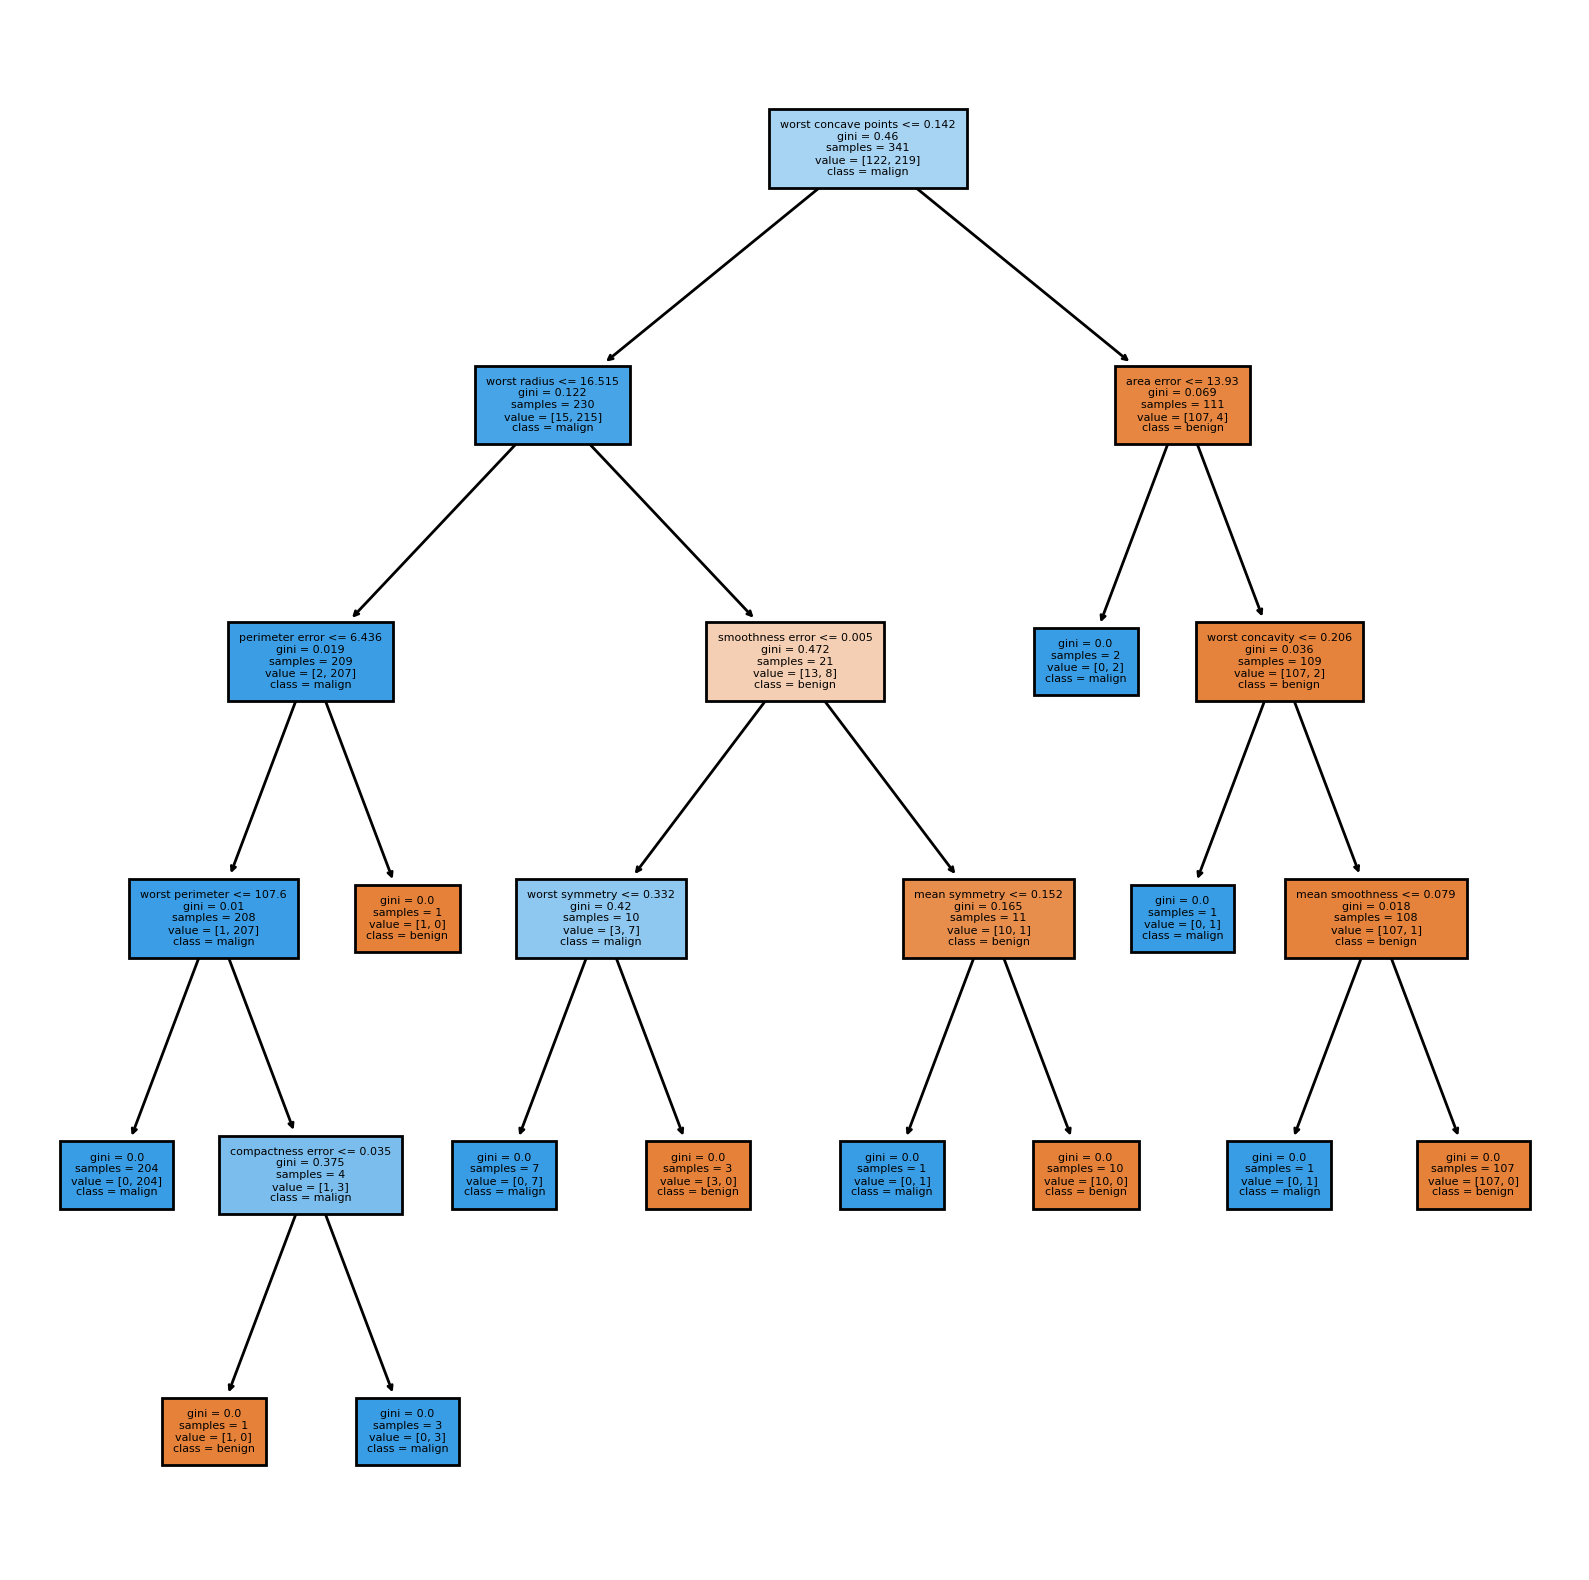

In [20]:
breast_dec_tree = DecisionTreeClassifier()
breast_dec_tree.fit(train[input_features], train['target'])

print('Accuracy: ', round(100*breast_dec_tree.score(test[input_features], test['target']), 2), '%')
print('Depth of the decision tree: ', breast_dec_tree.get_depth())
max_depth = breast_dec_tree.get_depth()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=200)
tree.plot_tree(breast_dec_tree,
               feature_names = input_features, 
               class_names= ['benign', 'malign'],
               label='all',
               impurity=True,
               proportion=False,
               filled=True,
               fontsize=4);

<p> We will see how the accuracy grows as the tree grows <p>

Accuracy:  87.72 %
Depth of the decision tree:  1
Accuracy:  90.79 %
Depth of the decision tree:  2
Accuracy:  92.11 %
Depth of the decision tree:  3
Accuracy:  92.11 %
Depth of the decision tree:  4


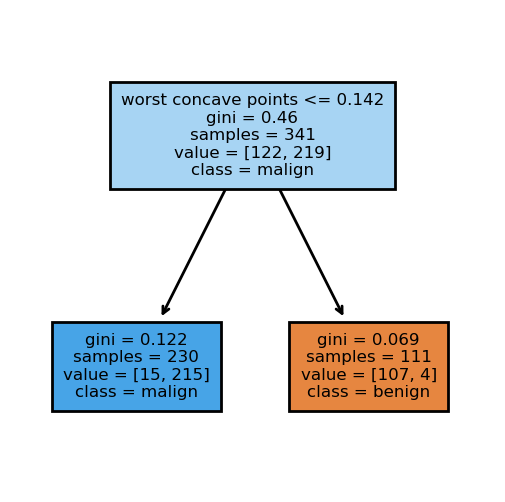

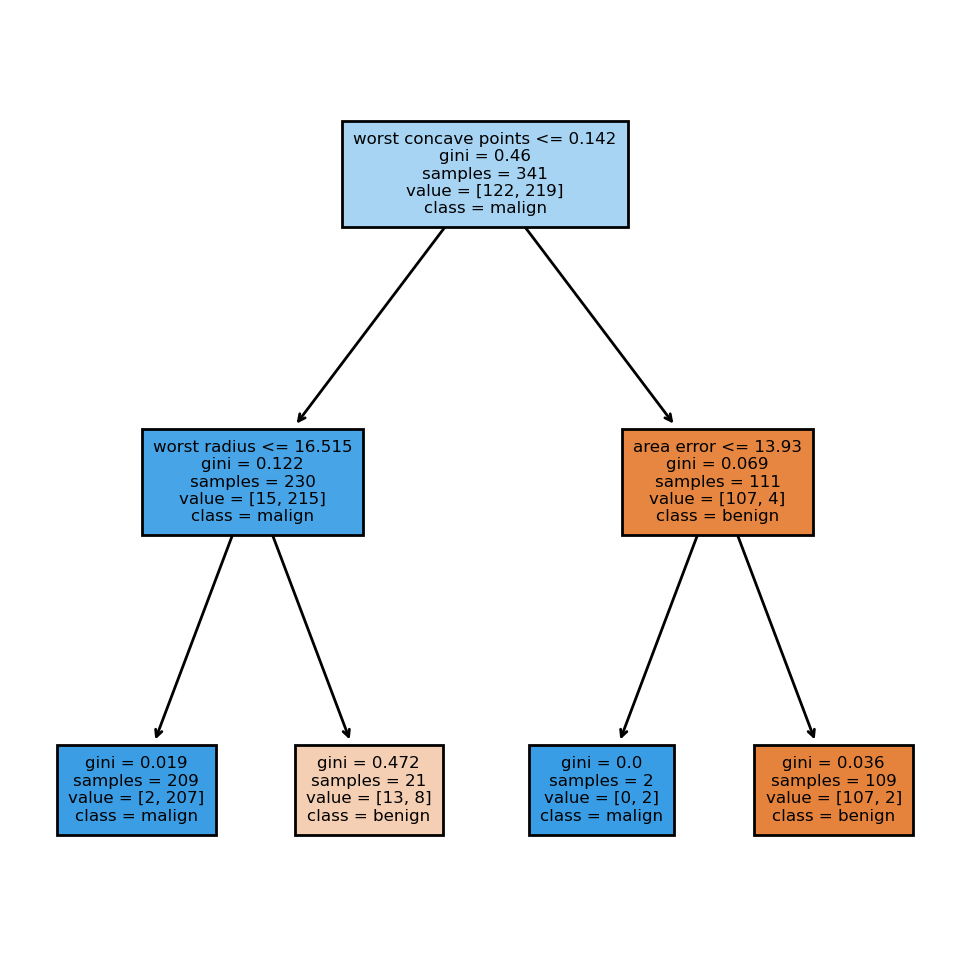

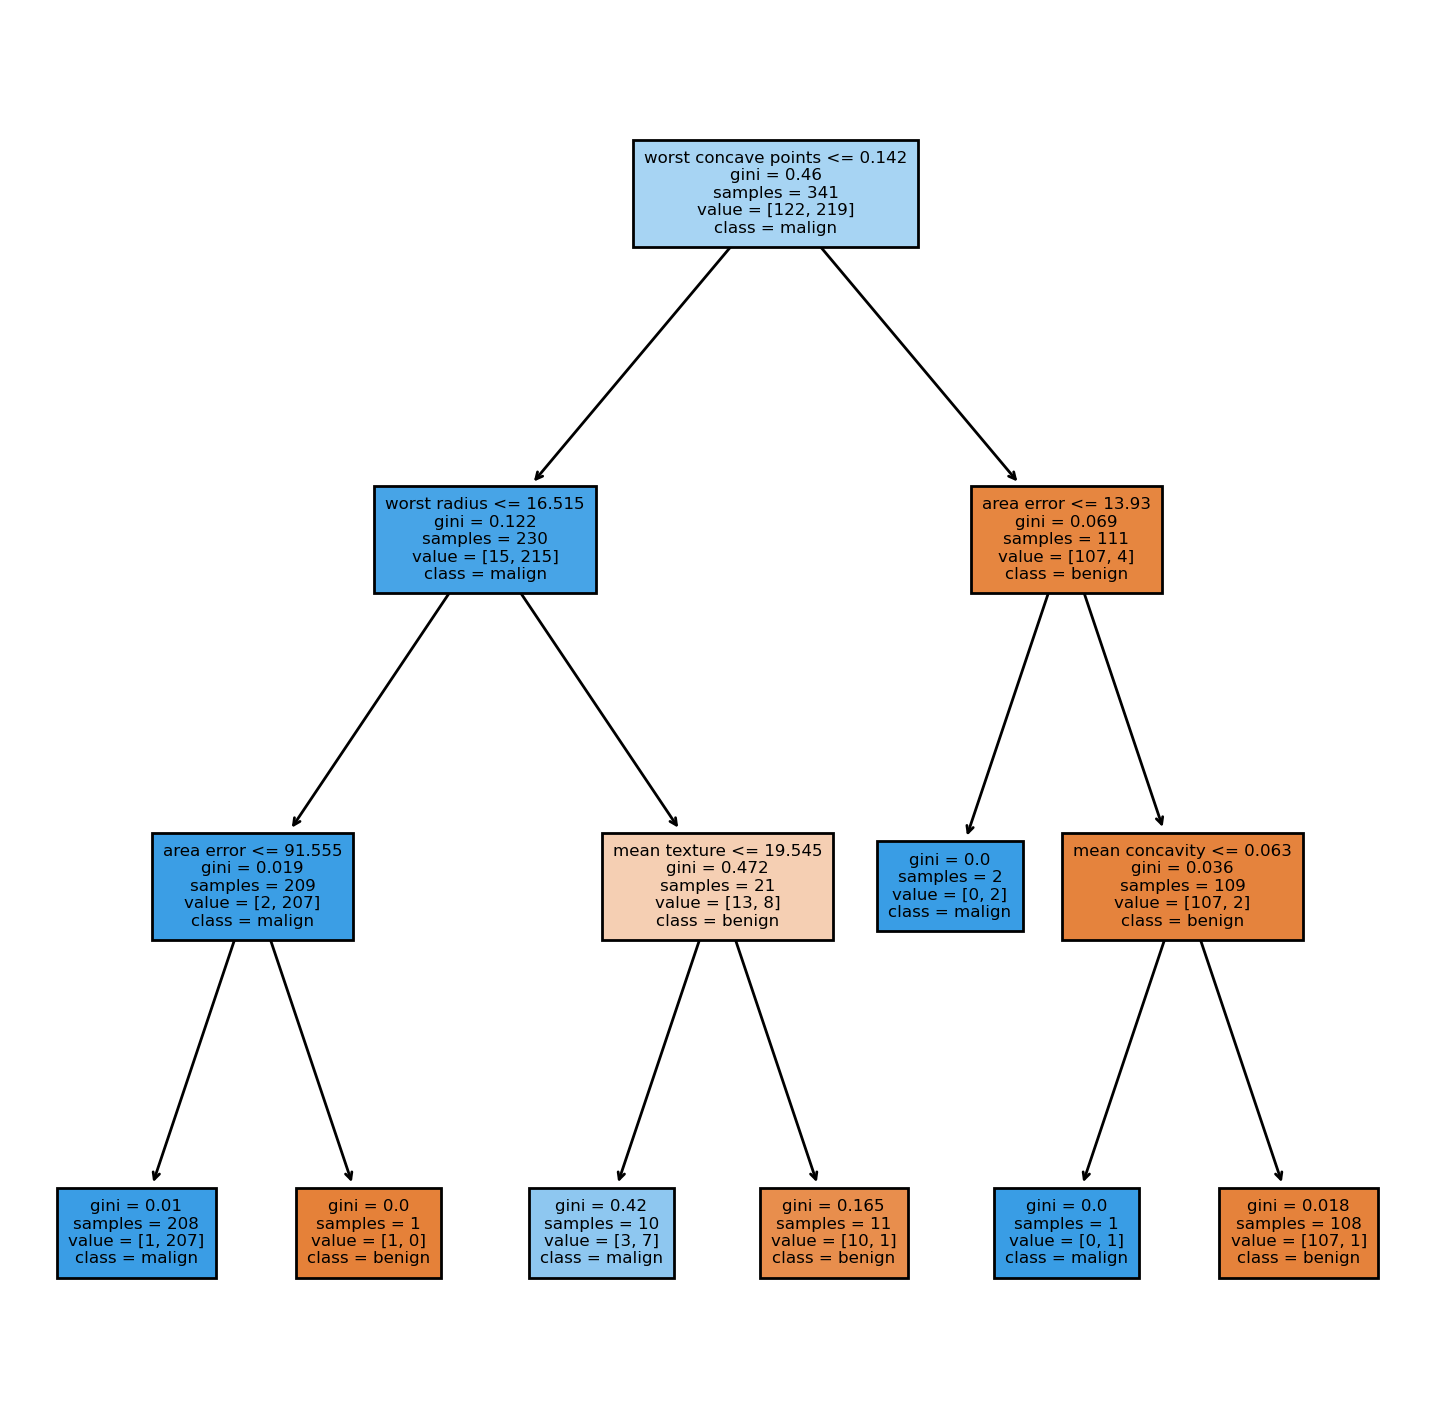

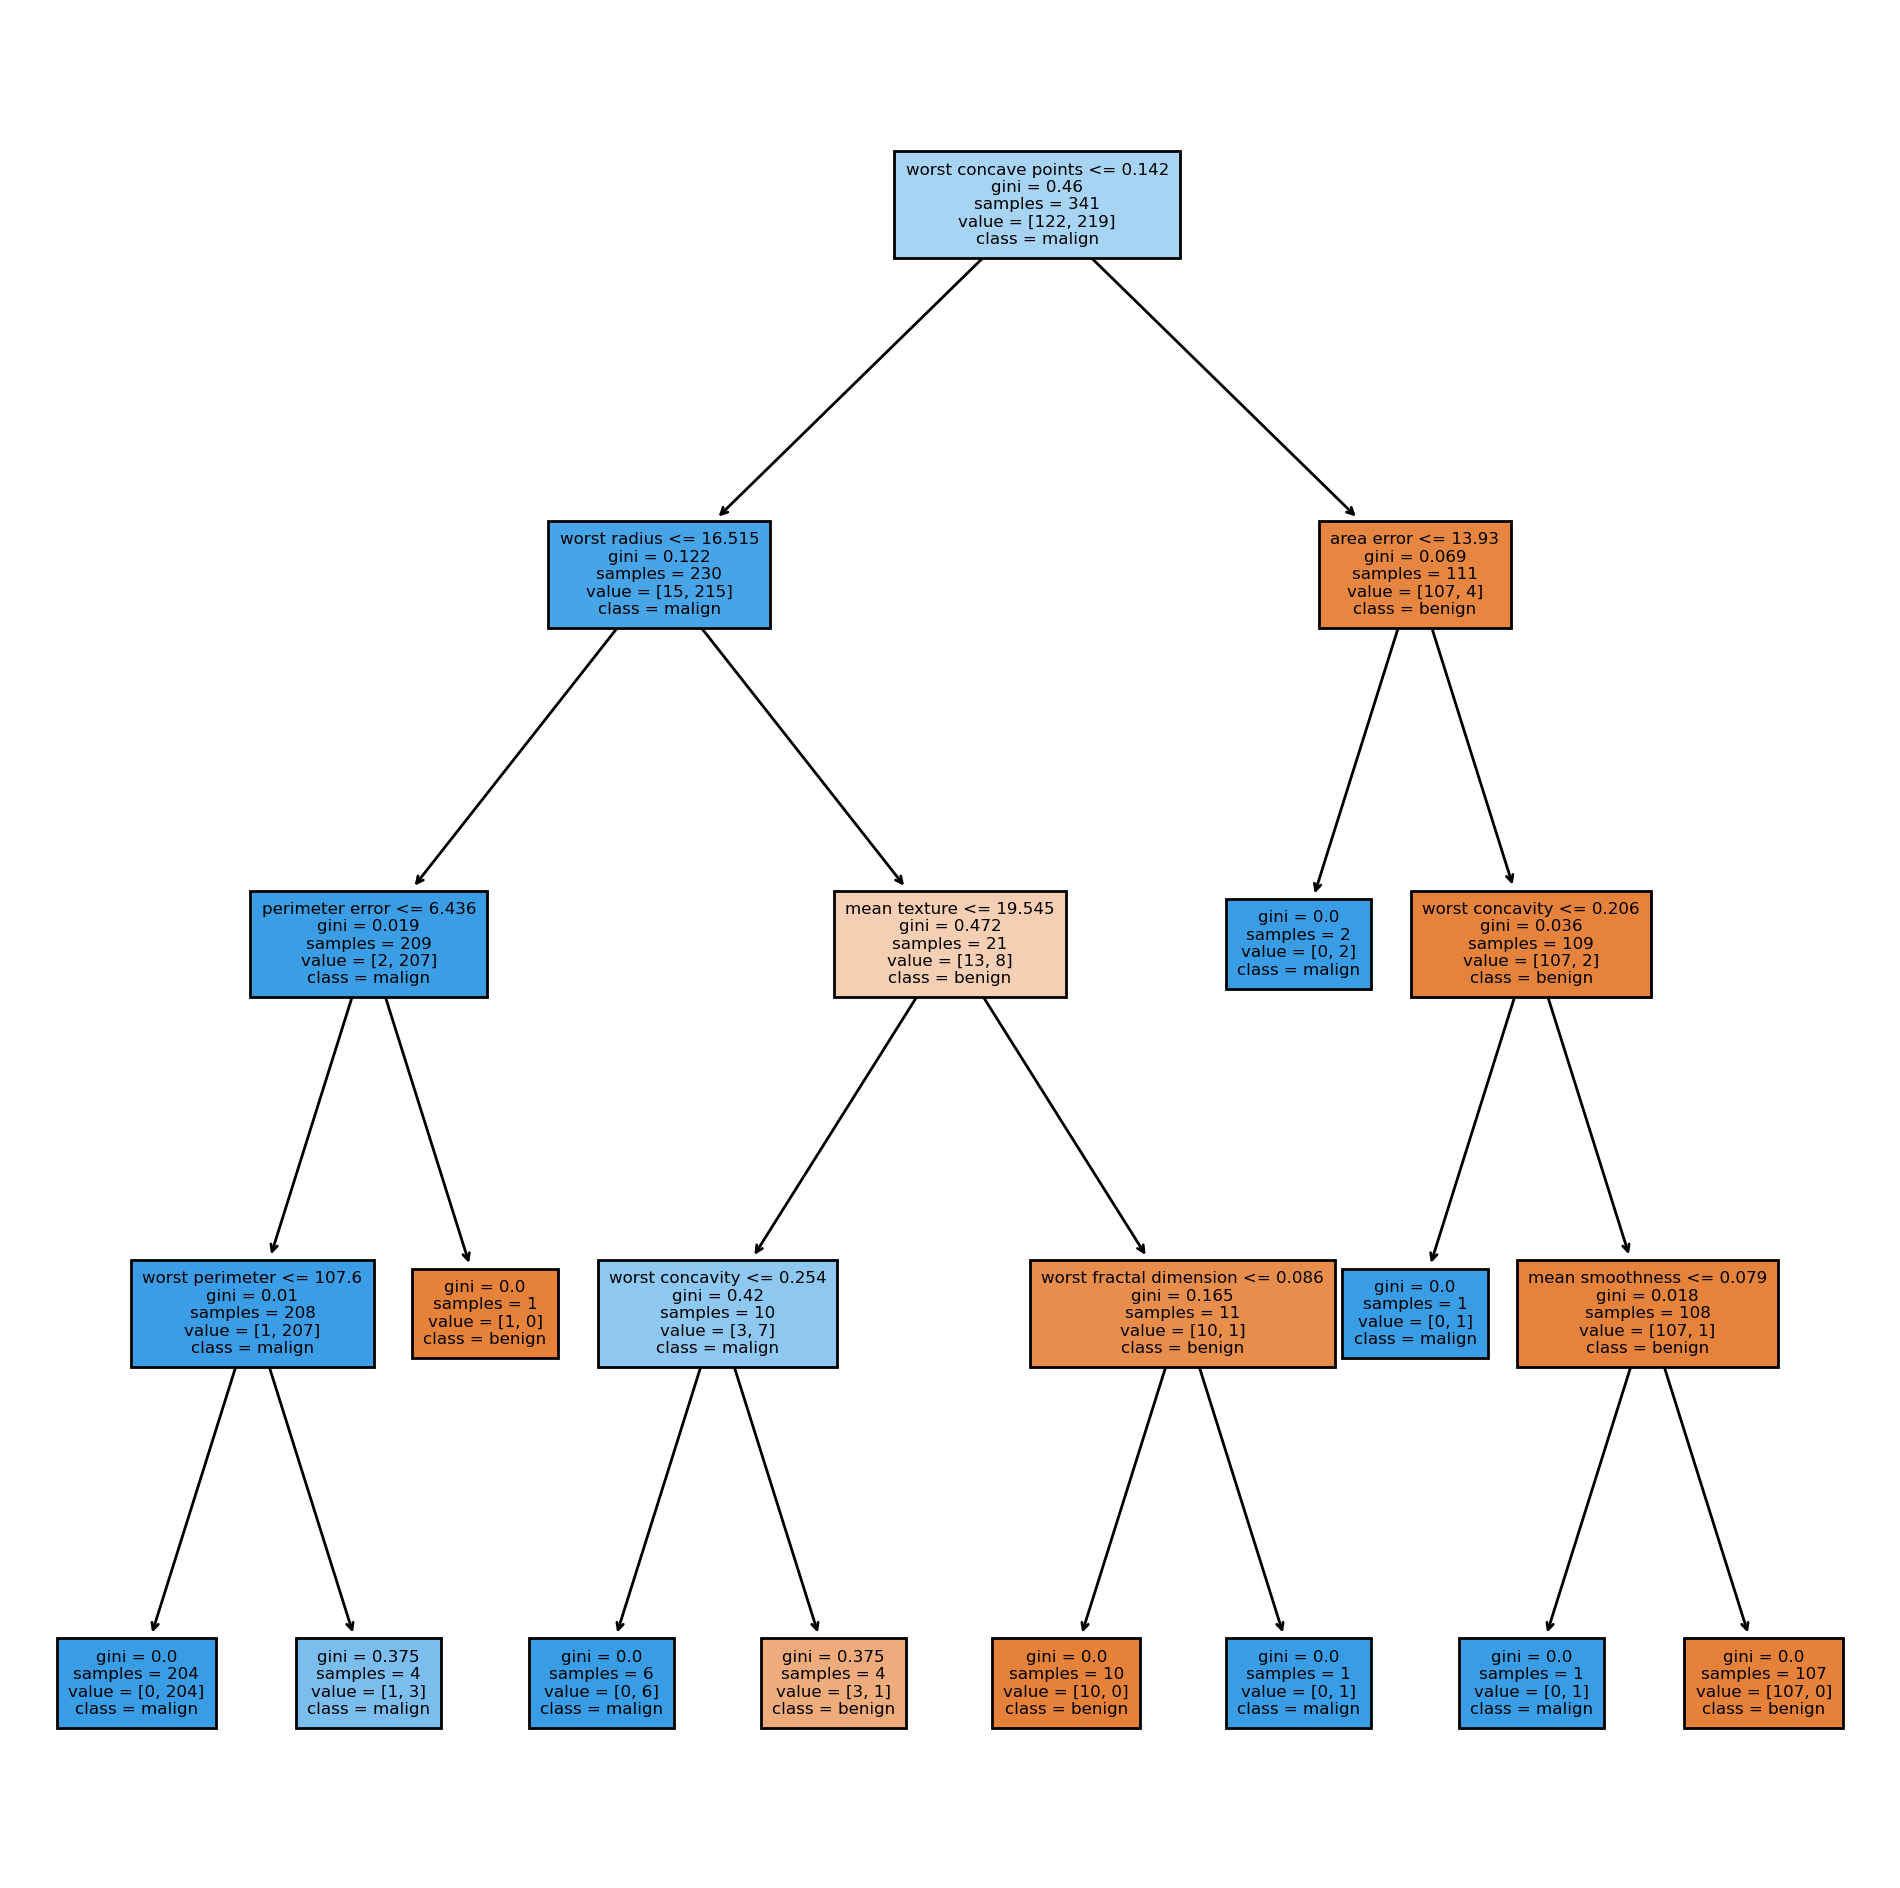

In [21]:
for d in range(1, max_depth):
    breast_dec_tree = DecisionTreeClassifier(max_depth=d)
    breast_dec_tree.fit(train[input_features], train['target'])
    
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (d*3, d*3), dpi=200)
    tree.plot_tree(breast_dec_tree,
                   feature_names = input_features, 
                   class_names= ['benign', 'malign'],
                   label='all',
                   impurity=True,
                   proportion=False,
                   filled=True,
                   fontsize=6);
    print('Accuracy: ', round(100*breast_dec_tree.score(test[input_features], test['target']), 2), '%')
    print('Depth of the decision tree: ', breast_dec_tree.get_depth())

In [22]:
sorted(list(zip(breast_dec_tree.feature_importances_, input_features)), reverse=True)

[(0.7868940953456163, 'worst concave points'),
 (0.09223579854256891, 'worst radius'),
 (0.03022126746950247, 'worst concavity'),
 (0.025286165827634547, 'mean texture'),
 (0.02462597478925977, 'area error'),
 (0.012891557155384854, 'mean smoothness'),
 (0.012825562638561034, 'perimeter error'),
 (0.011829126361780474, 'worst fractal dimension'),
 (0.003190451869691704, 'worst perimeter'),
 (0.0, 'worst texture'),
 (0.0, 'worst symmetry'),
 (0.0, 'worst smoothness'),
 (0.0, 'worst compactness'),
 (0.0, 'worst area'),
 (0.0, 'texture error'),
 (0.0, 'symmetry error'),
 (0.0, 'smoothness error'),
 (0.0, 'radius error'),
 (0.0, 'mean symmetry'),
 (0.0, 'mean radius'),
 (0.0, 'mean perimeter'),
 (0.0, 'mean fractal dimension'),
 (0.0, 'mean concavity'),
 (0.0, 'mean concave points'),
 (0.0, 'mean compactness'),
 (0.0, 'mean area'),
 (0.0, 'fractal dimension error'),
 (0.0, 'concavity error'),
 (0.0, 'concave points error'),
 (0.0, 'compactness error')]

Accuracy:  92.11 %


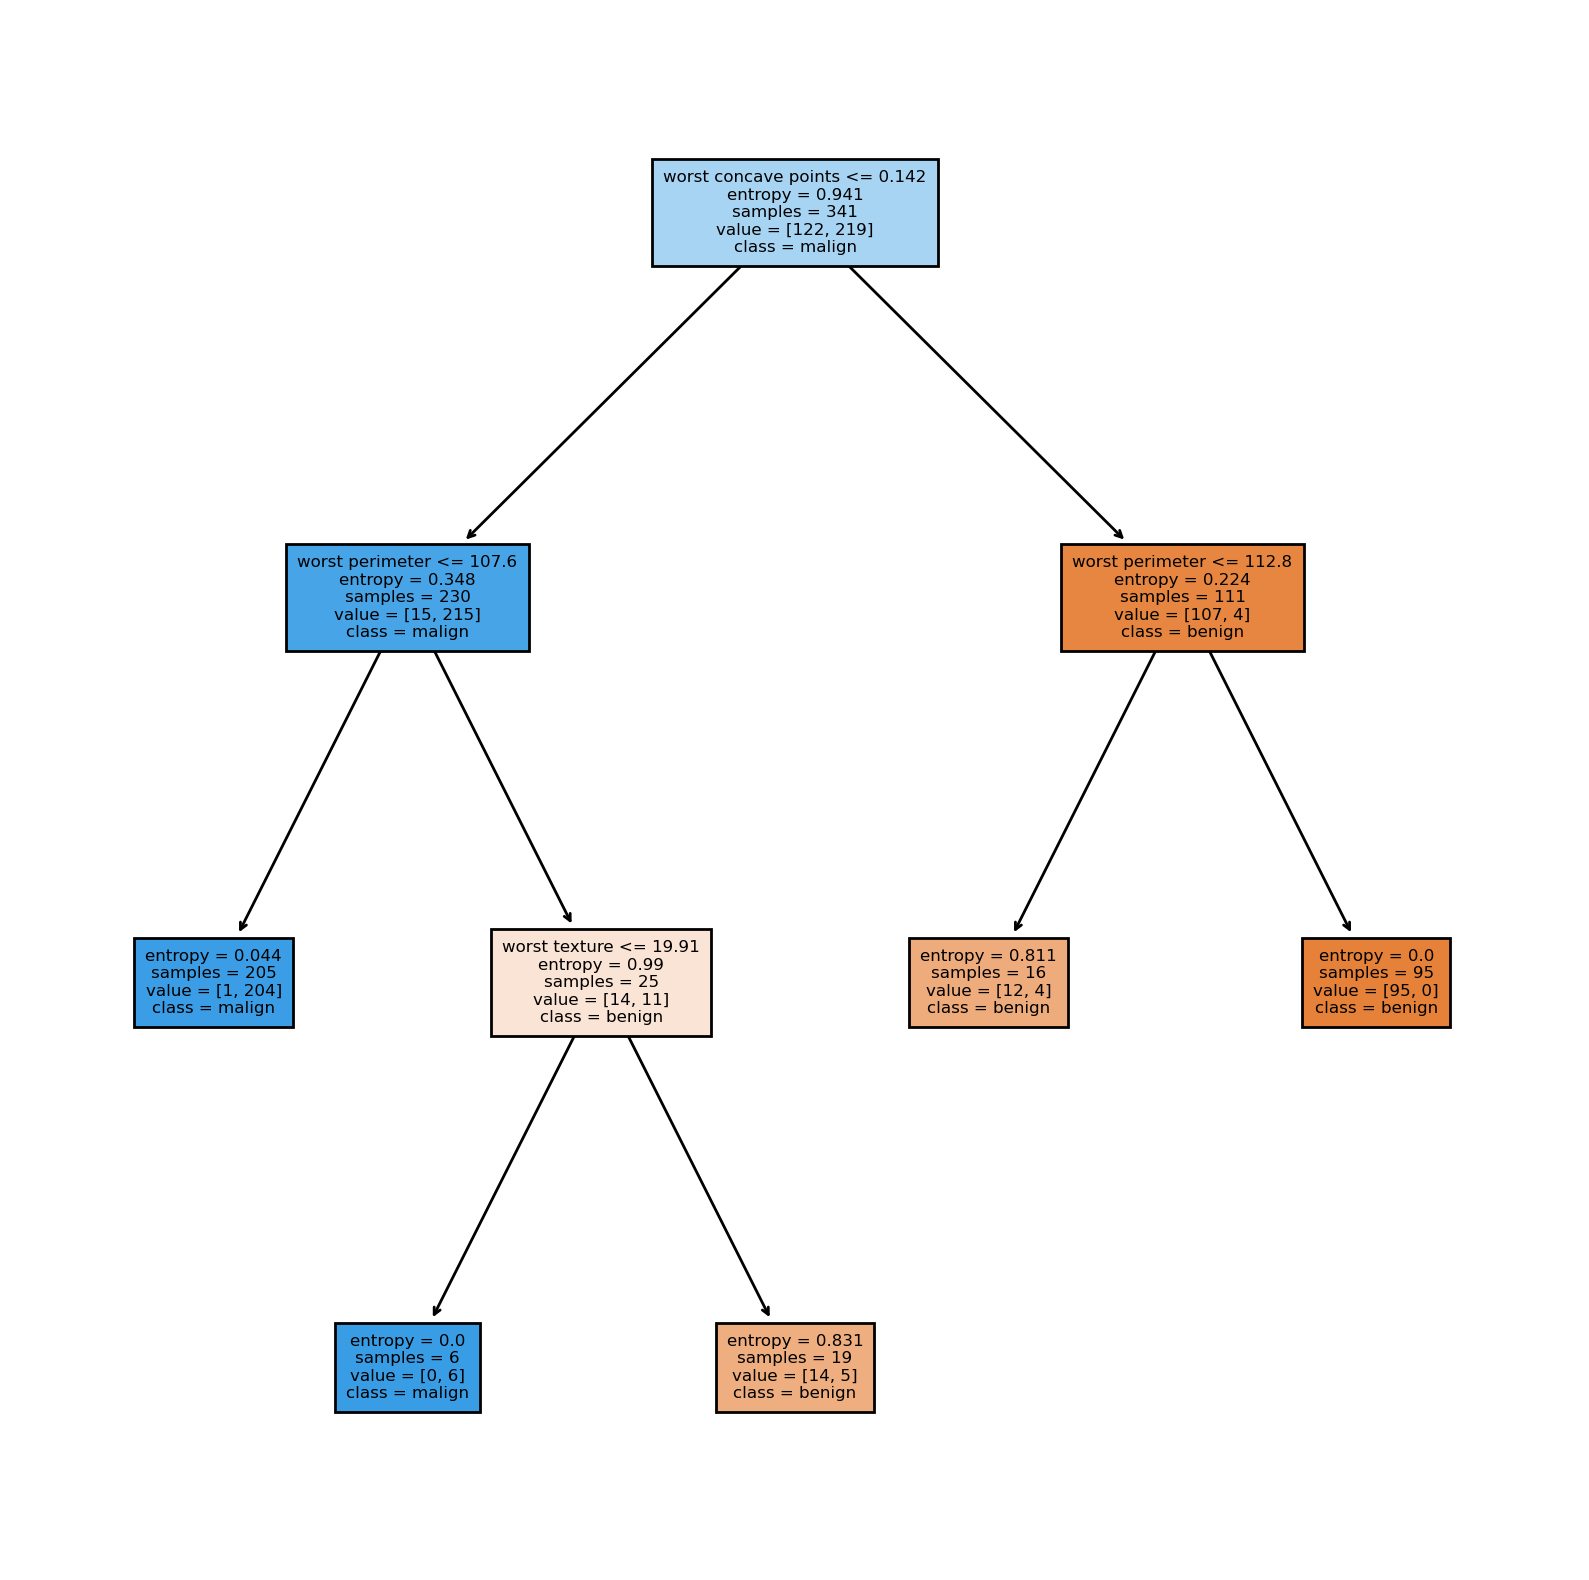

In [25]:
# Now train the Tree again with tunning the parameters

breast_dec_tree = DecisionTreeClassifier(
    criterion='entropy', # Could also be 'gini'
    splitter='best',     # Could also be 'random'
    max_depth=100,        # We've seen this already - how much the tree can grow "vertically"
    min_samples_split=3, # Only divide a leaf node if it has more than 3 samples in it - you can see how many samples represent each node in the trees above with the parameter "samples"
    min_samples_leaf=3,  # Leaf nodes are not allowed to represent less than 3 samples in them
    max_leaf_nodes=5,    # The number number of leaf nodes we allow - or how much the tree can grow "horizontally"
    min_impurity_decrease=0, # We only allow a leaf node to be split into two if the impurity is reduced more than this parameter
    # class_weight='balanced', # If you want to give more weight at some classes over others, so the resulting tree will be more specialised in predicting some classes better 
    
)
breast_dec_tree.fit(train[input_features], train['target'])
predictions = breast_dec_tree.predict(test[input_features])

# We calculate its accuracy (without using the `score` function as before):
right_predictions = 0
for p, r in zip(predictions, test['target']):
    if p==r:
        right_predictions+=1
print('Accuracy: ', round(100*right_predictions/len(predictions), 2), '%')


# And finally we plot it out:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=200)
tree.plot_tree(breast_dec_tree,
               feature_names = input_features, 
               class_names= ['benign', 'malign'],
               label='all',
               impurity=True,
               proportion=False,
               filled=True,
               fontsize=6);

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

breast_rf = RandomForestClassifier(
    # Decision Tree Parameters:
    criterion='entropy', # Could also be 'gini'
    max_depth=1,         # How much the tree can grow "vertically"
    min_samples_split=2, # Only divide a leaf node if it has more than 3 samples in it - you can see how many samples represent each node in the trees above with the parameter "samples"
    min_samples_leaf=1,  # Leaf nodes are not allowed to represent less than 3 samples in them
    max_leaf_nodes=2,    # The number number of leaf nodes we allow - or how much the tree can grow "horizontally"
    min_impurity_decrease=0, # We only allow a leaf node to be split into two if the impurity is reduced more than this parameter
    
    # Forest Parameters:
    n_estimators=2,
    bootstrap=True,
    max_samples=len(test),
    n_jobs=-1,
    warm_start=False,
)

In [28]:
breast_rf.fit(train[input_features], train['target'])

RandomForestClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2,
                       max_samples=228, min_impurity_decrease=0, n_estimators=2,
                       n_jobs=-1)

In [29]:
breast_rf.score(test[input_features], test['target'])

0.8771929824561403

In [34]:
# We can see all of the trees in the forest!
print("Our random forest model has", len(breast_rf.estimators_), "trees")

print("\nLet's check the first 5:")
for t in breast_rf.estimators_[:5]:
    print(t)


Our random forest model has 2 trees

Let's check the first 5:
DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=2, min_impurity_decrease=0,
                       random_state=2044135721)
DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='sqrt',
                       max_leaf_nodes=2, min_impurity_decrease=0,
                       random_state=506311702)
